# 统计推断基础

- 数据说明：本数据是地区房价增长率数据
- 名称-中文含义
- dis_name-小区名称
- rate-房价同比增长率

In [2]:
import pandas as pd

house_price_gr = pd.read_csv('./house_price_gr.csv', encoding='gbk')
house_price_gr.head()

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


进行描述性统计分析。

In [3]:
house_price_gr['rate'].median()

0.10490818928216152

In [4]:
house_price_gr['rate'].min()

0.0295403779715148

In [5]:
house_price_gr['rate'].max()

0.24374331395402105

In [6]:
house_price_gr.describe()

,rate
count,150.000000
mean,0.110061
std,0.041333
min,0.029540
25%,0.080027
50%,0.104908
75%,0.140066
max,0.243743


## Histograph 直方图

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


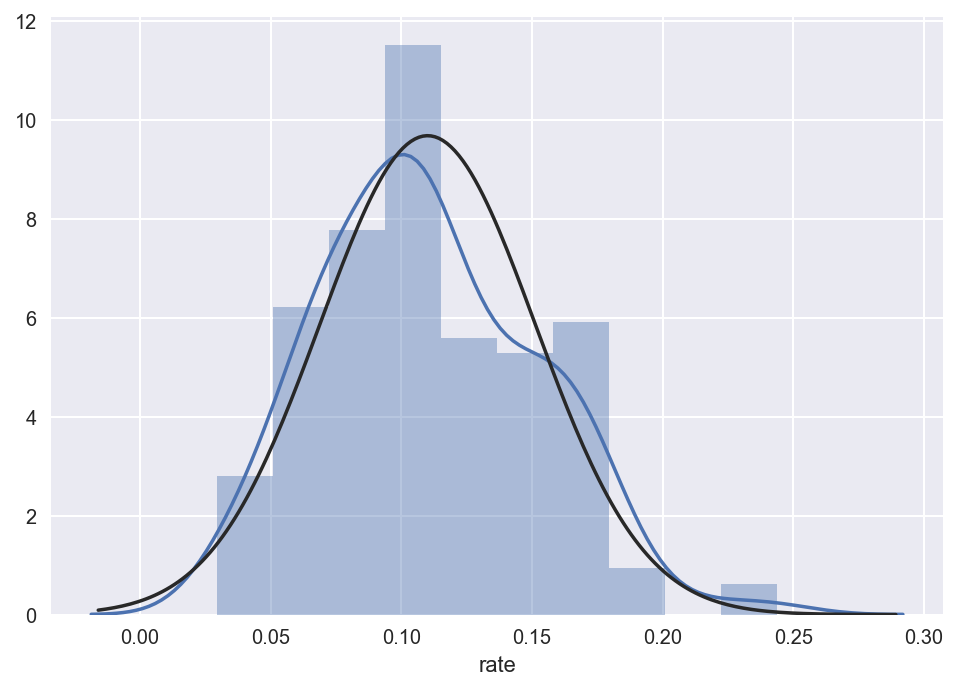

In [7]:
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm)  # Histograph
plt.show()

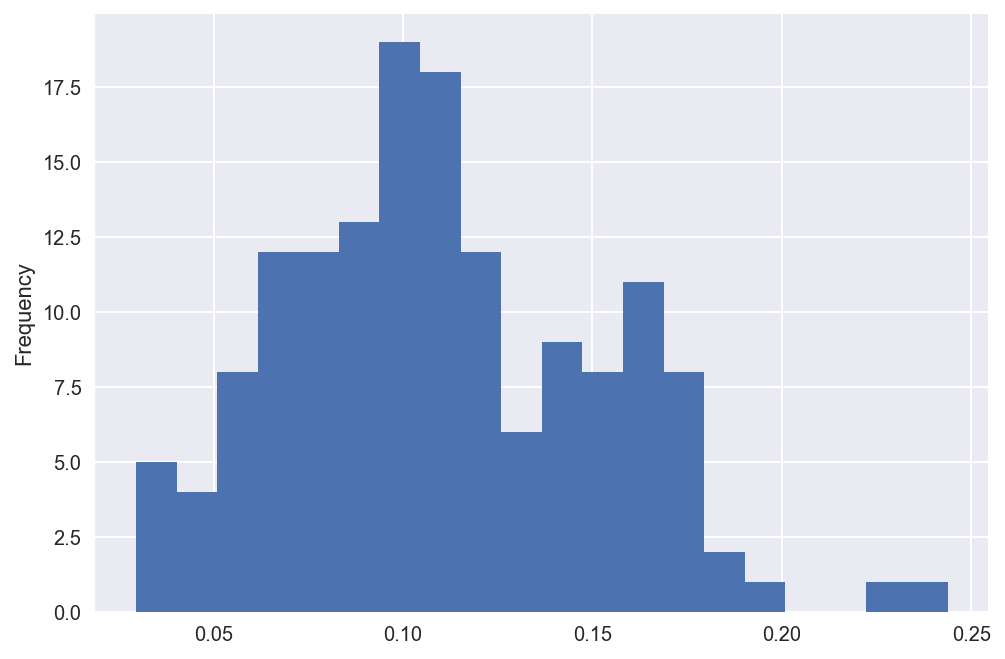

In [8]:
house_price_gr['rate'].plot(kind='hist', bins=20)
plt.show()

## QQ 图：反映变量与正态分布的接近程度

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


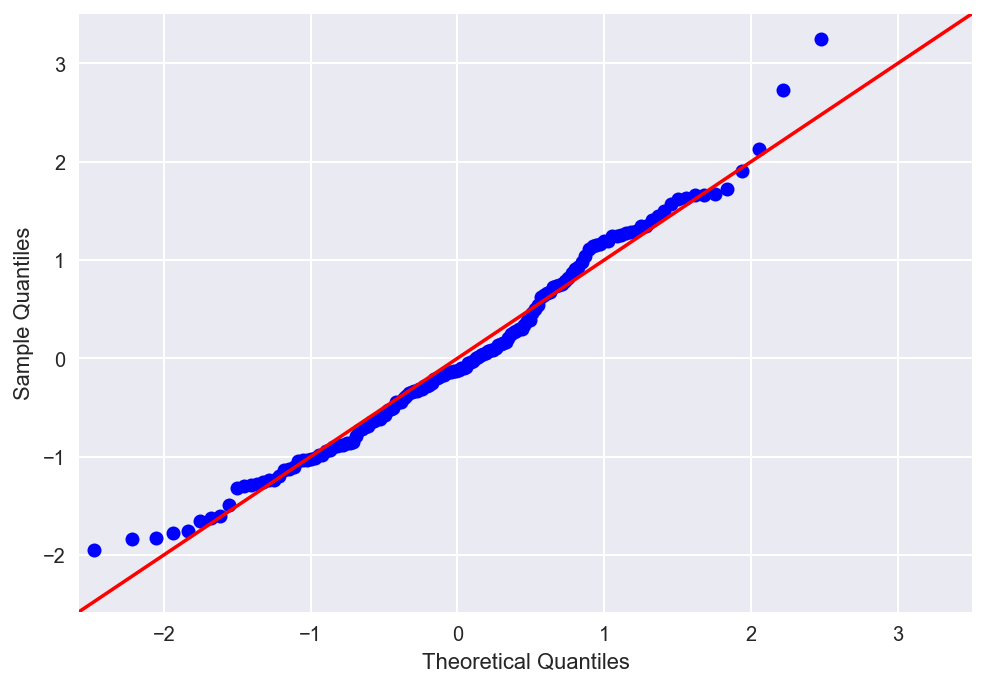

In [9]:
import statsmodels.api as sm

fig = sm.qqplot(house_price_gr['rate'], fit=True, line='45')
fig.show()

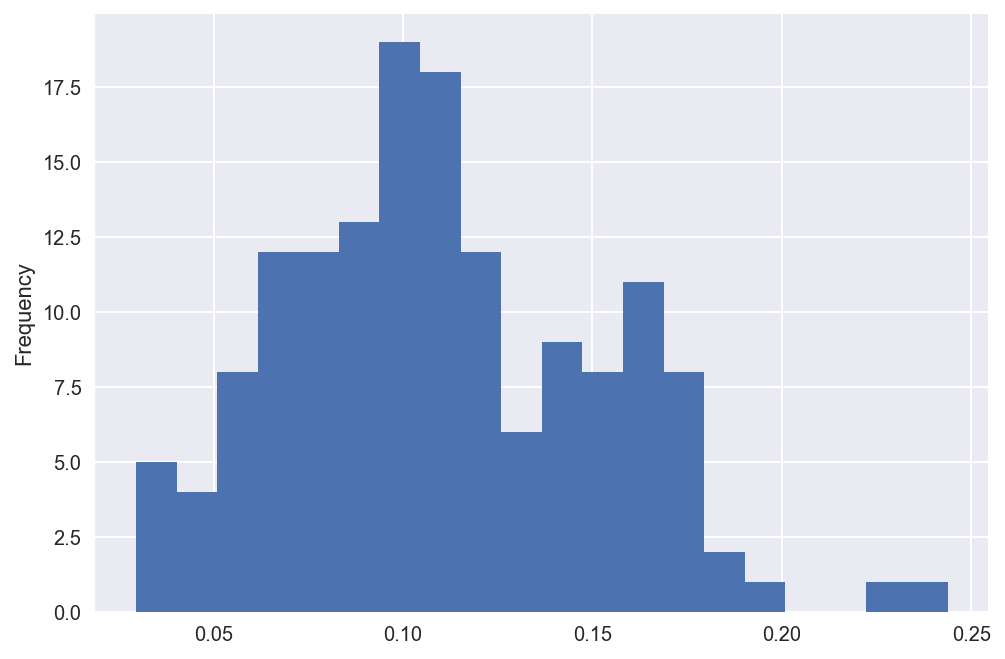

In [10]:
house_price_gr['rate'].plot(kind='hist', bins=20)
plt.show()

In [11]:
# 右偏，众数小于平均值
house_price_gr['rate'].skew()

0.41086900193346765

In [12]:
house_price_gr['rate'].kurt()

-0.10127923414513074

### 箱线图

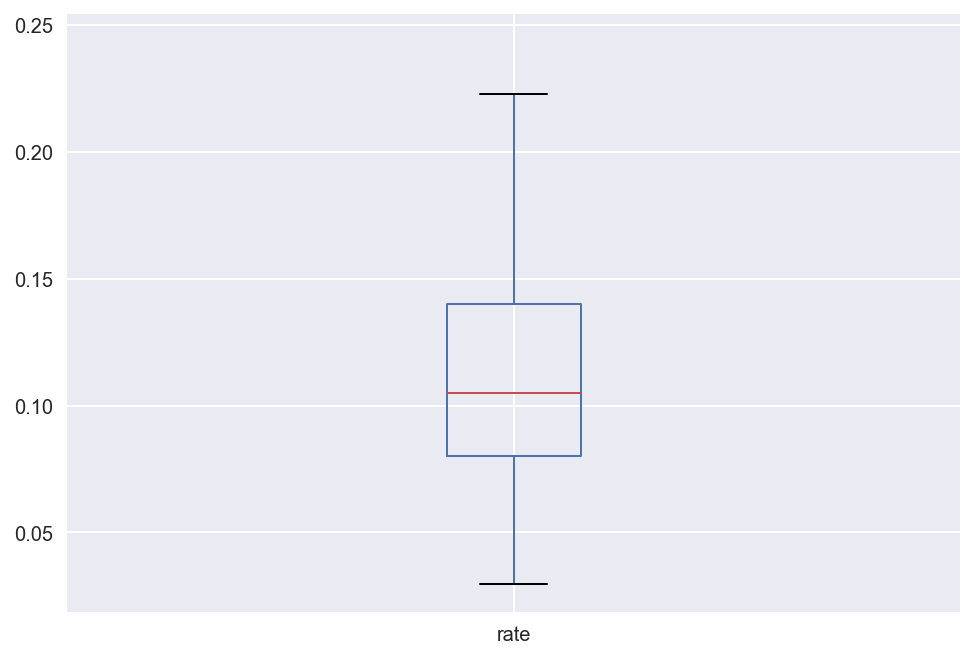

In [16]:
house_price_gr.plot(kind='box') # Box Plots
plt.show()

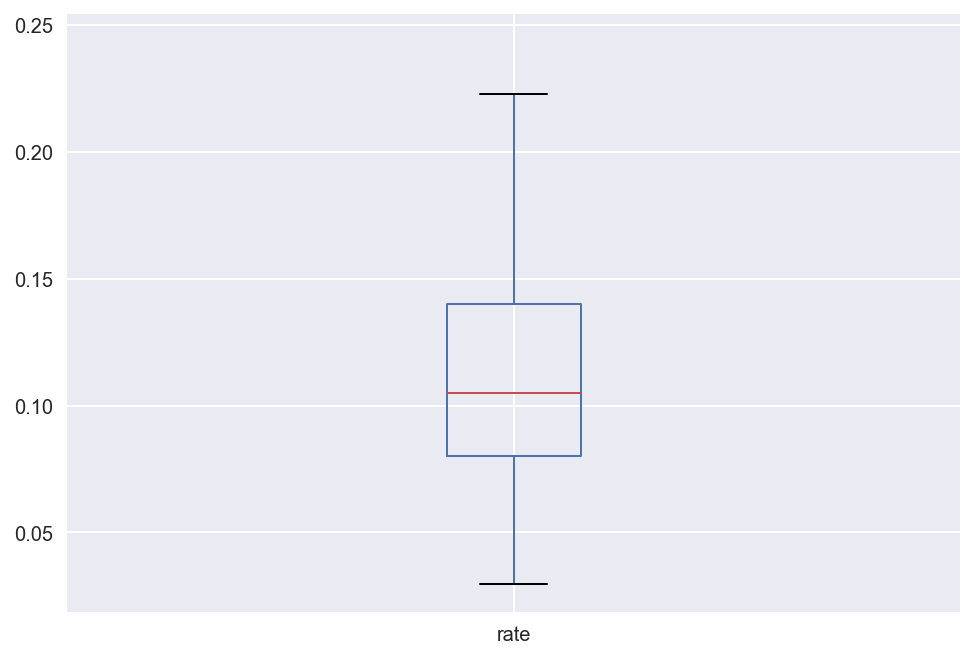

In [17]:
house_price_gr['rate'].plot(kind='box')
plt.show()

## 置信度区间估计

In [18]:
se = house_price_gr.rate.std() / len(house_price_gr)**0.5
LB = house_price_gr.rate.mean() - 1.98 * se
UB = house_price_gr.rate.mean() + 1.98 * se
(LB, UB)

(0.1033788285317501, 0.11674316487209627)

## 计算置信区间

In [19]:
len(house_price_gr.rate)

150

### 手动计算（使用分位点计算）

这是 1.98 的来历。

累计概率是 0.975 的地方是什么数值，可以查 t 分布，知道是 1.98。

In [20]:
from scipy import stats

stats.t.ppf(1 - 0.025, df=149)

1.976013177679155

In [21]:
# 如果要求任意置信度下的置信区间的话，可以自己编一个函数
# ppf 是计算分位点的函数
def confint(x, alpha=0.05):
    n = len(x)
    xb = x.mean()
    df = n - 1
    tmp = (x.std() / n**0.5) * stats.t.ppf(1 - alpha / 2, df)
    return {
        'Mean': xb,
        'Degree of Freedom': df,
        'LB': xb - tmp,
        'UB': xb + tmp
    }


confint(house_price_gr.rate, 0.05)

{'Degree of Freedom': 149,
 'LB': 0.10339228338892811,
 'Mean': 0.11006099670192318,
 'UB': 0.11672971001491825}

## 直接使用现成的 api 计算

In [22]:
import statsmodels.api as sm

# 或者使用 DescrStatsW
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
# 计算置信区间，0.05 是置信度
d1.tconfint_mean(alpha=0.05) # 

(0.10339228338892814, 0.11672971001491828)

## 假设检验与单样本 T 检验

当年住宅价格的增长率是否超过了$10\%$ 的阈值。

返回值：
tstat : 统计量
pvalue : t 检验的 p 值
df : 自由度

In [25]:
tstat, pvalue, df = d1.ttest_mean(value=0.1)
tstat, pvalue, df

(2.9811840951156325, 0.00335478492321549, 149.0)

### 检验统计量是如何计算的？

总体方差已知的时候，使用标准正态分布。

这里<span class="burk">总体方差肯定是未知的</span>，因此，检验统计量选择为：

$$
t = \cfrac{\bar X - \mu_0}{S/\sqrt{n}}
$$

服从自由度为 $n-1$ 的 t 分布，所以又叫 t 检验。

### p 值如何计算

In [26]:
from scipy import stats

t = (house_price_gr.rate.mean() - 0.1) / (house_price_gr.rate.std() / 150**0.5)

(1 - stats.t.cdf(x=t, df=150)) * 2

0.0033514322853904766

### 统计量如何计算

In [27]:
(house_price_gr.rate.mean() - 0.1) / (house_price_gr.rate.std() / 150**0.5)

2.9811840951156254

## 对总体均值的假设检验

In [28]:
print('t-statistic=%6.4f, p-value=%6.4f, df=%s' % d1.ttest_mean(0.1))
#一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690

t-statistic=2.9812, p-value=0.0034, df=149.0


p 值小于 0.05  ，拒绝原假设，即认为增长率不是 $10\%$。

## 两样本T检验
- 数据集描述与属性说明
- ID	客户编号
- Suc_flag	成功入网标识
- ARPU	入网后ARPU
- PromCnt12	12个月内的营销次数
- PromCnt36	36个月内的营销次数
- PromCntMsg12	12个月内发短信的次数
- PromCntMsg36	36个月内发短信的次数
- Class	客户重要性等级(根据前运营商消费情况)
- Age	年龄
- Gender	性别
- HomeOwner	是否拥有住房
- AvgARPU	当地平均ARPU
- AvgHomeValue	当地房屋均价
- AvgIncome	当地人均收入

In [30]:
# 导入数据
camp= pd.read_csv('tele_camp_ok.csv', skipinitialspace=True)
camp.head()

,Unnamed: 0,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome,Age_empflag,AvgHomeValue_empflag,AvgIncome_empflag,Age_group1,Age_group2
0,0,12,1,50.0,5.65,9.50,1.6,3.0,4,79.000000,M,H,49.894904,33400.0,39460.000000,False,False,False,"(69, 86]","(69.75, 86]"
1,1,53,0,NaN,4.50,9.00,1.4,3.6,3,71.000000,M,H,48.574742,37600.0,33545.000000,False,False,False,"(69, 86]","(69.75, 86]"
2,2,67,1,25.0,6.40,11.00,2.0,3.6,1,79.000000,F,H,49.272646,100400.0,42091.000000,False,False,False,"(69, 86]","(69.75, 86]"
3,3,71,1,80.0,7.15,10.25,2.4,3.6,1,63.000000,F,H,47.334953,39900.0,39313.000000,False,False,False,"(59.159, 69]","(53.5, 69.75]"
4,4,142,1,15.0,5.90,10.50,2.0,3.8,1,59.158972,F,U,47.827404,47500.0,53513.457361,True,False,True,"(51, 59.159]","(53.5, 69.75]"


### 根据是否入网比较外呼次数

In [31]:
camp['PromCnt12'].groupby(camp['Suc_flag']).describe()

,count,mean,std,min,25%,50%,75%,max
Suc_flag,,,,,,,,
0,4843.0,3.188623,1.073982,0.75,2.75,3.00,3.25,11.50
1,4843.0,3.705802,1.322201,0.90,3.15,3.65,3.90,15.15


- 第一步:方差齐次检验

In [32]:
Suc0 = camp[camp['Suc_flag'] == 0]['PromCnt12']
Suc1 = camp[camp['Suc_flag'] == 1]['PromCnt12']
leveneTestRes = stats.levene(Suc0, Suc1, center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=41.2318, p-value=0.0000


+ 第二步:T-test

In [33]:
stats.stats.ttest_ind(Suc0, Suc1, equal_var=False)
# Or Try: sm.stats.ttest_ind(gender0, gender1, usevar='pooled')

Ttest_indResult(statistic=-21.128847164345515, pvalue=7.979829658649097e-97)

## 方差分析

### 单因素方差分析

In [35]:
pd.set_option('display.max_columns', None) # 设置显示所有列
camp.groupby('Class')[['PromCnt12']].describe().T

Class                      1            2            3            4
PromCnt12 count  2139.000000  3303.000000  2237.000000  2007.000000
          mean      3.421809     3.455843     3.588780     3.302292
          std       1.117565     1.254955     1.349076     1.153418
          min       0.900000     0.750000     0.900000     0.900000
          25%       3.000000     2.900000     3.000000     2.750000
          50%       3.250000     3.250000     3.250000     3.150000
          75%       3.650000     3.650000     3.650000     3.650000
          max      12.650000    15.150000    14.900000    10.400000

In [36]:
# 利用回归模型中的方差分析
import statsmodels.api as sm
from statsmodels.formula.api import ols

sm.stats.anova_lm(ols('PromCnt12 ~ C(Class)', data=camp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,88.609587,29.536529,19.575263,1.198571e-12
Residual,9682.0,14608.880150,1.508870,NaN,NaN


### 多因素方差分析

In [37]:
sm.stats.anova_lm(ols('PromCnt12 ~ C(Class)+C(Age_group1)',data=camp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,88.609587,29.536529,19.729680,9.557211e-13
C(Age_group1),3.0,118.829642,39.609881,26.458433,4.893018e-17
Residual,9679.0,14490.050508,1.497061,NaN,NaN


## 相关分析

### 散点图

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


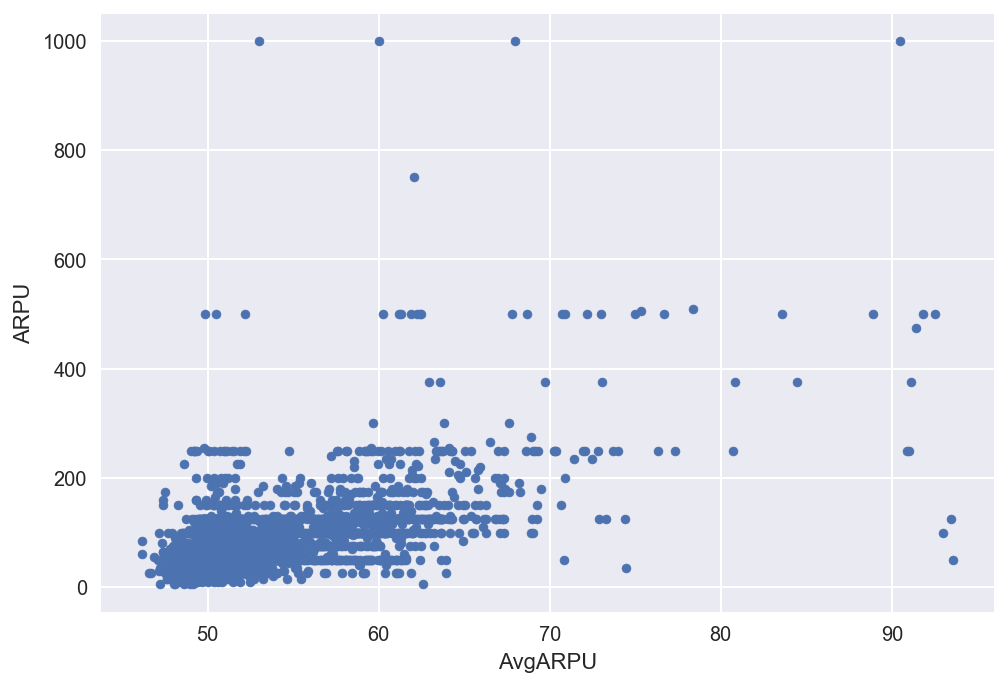

In [39]:
camp.plot(x='AvgARPU', y='ARPU', kind='scatter')
plt.show()

相关性分析：“spearman”,“pearson” 和 "kendall"。

In [40]:
camp[['AvgARPU', 'ARPU']].corr(method='pearson')

,AvgARPU,ARPU
AvgARPU,1.000000,0.597952
ARPU,0.597952,1.000000


## 卡方检验

### 列联表

In [42]:
cross_table = pd.crosstab(camp.Class, columns=camp.Suc_flag)
# Or try this: accepts.pivot_table(index='bankruptcy_ind',columns='bad_ind', values='application_id', aggfunc='count')
cross_table

Suc_flag,0,1
Class,,
1,869,1270
2,1722,1581
3,1173,1064
4,1079,928


In [43]:
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s'  %stats.chi2_contingency(cross_table))

chisq = 97.8667
 p-value = 0.0000
 dof = 3
 expected_freq = [[1069.5 1069.5]
 [1651.5 1651.5]
 [1118.5 1118.5]
 [1003.5 1003.5]]
